# Tutorial of network dynamics - BioModels
The network state-transition-graph (STG), controlled STG (C-STG) and controlled atttractor graph (CAG) for biological relevant boolean network models

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import division
import os
import graphviz
import cana
import matplotlib as mpl
import matplotlib.style
mpl.style.use('classic')
import math
import random
mpl.rc('font', **{'size':16})
import matplotlib.pyplot as plt
from cana.datasets.bio import THALIANA, DROSOPHILA, BUDDING_YEAST
from IPython.display import display, Image, Latex, SVG, HTML
import subprocess

In [4]:
N = THALIANA()
#N = DROSOPHILA()
#N = BUDDING_YEAST()
print(N)

<BNetwork(Name='Arabidopsis Thaliana', N=15, Nodes=['AP3', 'UFO', 'FUL', 'FT', 'AP1', 'EMF1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'PI', 'SEP'])>


In [5]:
STG = N.state_transition_graph()
attractors = N.attractors(mode='stg')
print( STG)
print( attractors)
print( 'Nodes: %d | Edges: %d' % (len(STG.nodes()) , len(STG.edges()) ))

STG: Arabidopsis Thaliana
[[6587], [3481], [540], [604], [31163], [28059], [8732], [8796], [22971], [19867]]
Nodes: 32768 | Edges: 32768


In [6]:
if N.name == 'Arabidopsis Thaliana':
    foldername = 'thaliana'
    DNnames = ['UFO','LUG','CLF','SEP','TFL1']
    DNi = [i for i,n in enumerate(N.nodes) if n.name in DNnames]

# Note: CANA will issue a warning for the constant input variables LUG and CLF as these have no inputs
CSTG = N.controlled_state_transition_graph(driver_nodes=DNi)
print( CSTG)
print( 'Nodes: %d | Edges: %d' % (len(CSTG.nodes()) , len(CSTG.edges()) ))

/Users/ajgates/Documents/GitHub/CANA/cana/boolean_network.py:612: UserWarning: Cannot control a constant variable 'LUG'! Skipping
  warnings.warn("Cannot control a constant variable '%s'! Skipping" % self.nodes[dv].name )
/Users/ajgates/Documents/GitHub/CANA/cana/boolean_network.py:612: UserWarning: Cannot control a constant variable 'CLF'! Skipping
  warnings.warn("Cannot control a constant variable '%s'! Skipping" % self.nodes[dv].name )


C-STG: Arabidopsis Thaliana (UFO,LUG,CLF,TFL1,SEP)
Nodes: 32768 | Edges: 1048493


In [7]:
CAG = N.controlled_attractor_graph(CSTG)
print( CAG)
print( 'Nodes: %d | Edges: %d' % (len(CAG.nodes()) , len(CAG.edges()) ))

CAG: C-STG: Arabidopsis Thaliana (UFO,LUG,CLF,TFL1,SEP)
Nodes: 10 | Edges: 37


In [8]:
# Node Position for each one of the models
att = {}
if N.name == 'Arabidopsis Thaliana':
    foldername = 'thaliana'
    
    # Calculates Node position in a circle. Used to plot nodes always in the same position.
    for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
        r = 120
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['UFO','LUG','CLF'], [(160.,90.),(180.,30.),(180.,-30.)]):
        att[name] = {'x':x,'y':y}

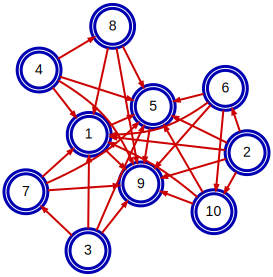

Node id: 1 label: 001100110111011
Node id: 2 label: 000110110011001
Node id: 3 label: 000001000011100
Node id: 4 label: 000001001011100
Node id: 5 label: 111100110111011
Node id: 6 label: 110110110011011
Node id: 7 label: 010001000011100
Node id: 8 label: 010001001011100
Node id: 9 label: 101100110111011
Node id: 10 label: 100110110011011


In [9]:
# Draw the Controlled Attractor Graph
S = graphviz.Digraph(name='Control State Transition Graph', engine='neato')
S.attr('graph', concentrate='true', simplify='false', overlap='false',splines='true')
S.attr('node', shape='doublecircle', fixedsize='true', width='0.5', style='filled', penwidth='3', fontname='Helvetica', fontcolor='black',fontsize='14')
S.attr('edge', arrowhead='normal', style='solid', arrowsize='.5')

for node,d in CAG.nodes(data=True):
    if node in attractors:
        fillcolor = 'gray'
    else:
        xy = 'false'
        fillcolor = 'white'
    S.node(name=str(node), label=str(node+1), fillcolor=fillcolor, color='#0000b2')

for s,t,d in CAG.edges(data=True):
    if (s,t) not in att:
        color='#cc0000'
    else:
        color='gray'
    S.edge(str(s),str(t), weight='1', color=color ,len='1.5', penwidth='2.')

# Display
display(SVG(S.pipe(format='svg')), metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u"%s/../experiments/2017 - BioModels/%s/graphs/CAG" % (os.getcwd(), foldername)
S.render(efile, cleanup=True)
subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)
for n,d in CAG.nodes(data=True):
    print( "Node id: {:d} label: {:s}".format(n+1,d['label']))

In [10]:
Nsg = N.structural_graph()

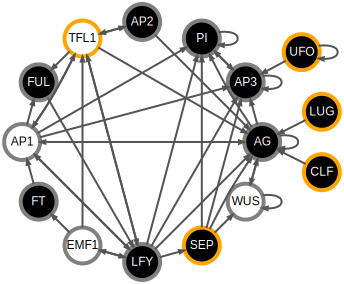

In [11]:
# Draw a Specific Attractor Configuration
n = 5 # [3, 5]
configuration = CAG.node[n-1]['label']

S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='true')
S.attr('node', shape='circle', fixedsize='true', width='.5', style='filled', penwidth='4', fontname='Helvetica', fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for state,(node,d) in zip(configuration, Nsg.nodes(data=True)):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
    else:
        xy = 'false'
    if node in DNi:
        color = '#ffa500'
    else:
        color = 'gray'
    if state=='1':
        fontcolor ='white'
        fillcolor = 'black'
    else:
        fontcolor ='black'
        fillcolor = 'white'
    S.node(name=str(node), label=d['label'], pos=xy, color=color, fillcolor=fillcolor, fontcolor=fontcolor)

max_penwidth = 2.
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )

## Display
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})

## Export
S._format = 'svg'
efile = u"%s/../experiments/2017 - BioModels/%s/graphs/CAG-%s" % (os.getcwd(),foldername, n)
#S.render(efile, cleanup=True)
#subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)

In [12]:
# Calculate Effective Graph
threshold = 0.00
Neg = N.effective_graph(mode='input',bound='upper', threshold=threshold)

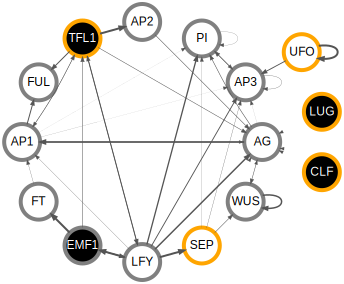

127

In [13]:
# Draw a Specific Attractor Configuration
n = 3 # [3, 5]
configuration = CAG.node[n-1]['label']
configuration = CAG.node[n-1]['label']

S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='true')
S.attr('node', shape='circle', fixedsize='true', width='.5', style='filled', penwidth='4', fontname='Helvetica', fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for state,(node,d) in zip(configuration, Neg.nodes(data=True)):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
    else:
        xy = 'false'
    if node in DNi:
        color = '#ffa500'
    else:
        color = 'gray'
    if state=='1':
        fontcolor ='white'
        fillcolor = 'black'
    else:
        fontcolor ='black'
        fillcolor = 'white'
    S.node(name=str(node), label=d['label'], pos=xy, color=color, fillcolor=fillcolor, fontcolor=fontcolor)

max_penwidth = 2.
for s,t,d in Neg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
# Display
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u"%s/../experiments/2017 - BioModels/%s/graphs/CAG-EG-%s" % (os.getcwd(),foldername, n)
S.render(efile, cleanup=True)
subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)